In [110]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import zeta
import scipy.integrate as spi
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Recombination

The Saha equation for the ionization fraction $X_e$ is given by:
\begin{align*}
    \left(\frac{1 - X_e}{X_e^2}\right) &= \frac{2\zeta(3)}{\pi^2}\eta\left(\frac{2\pi T}{m_e}\right)^{3/2}e^{E_I/T},
\end{align*}
where $\eta$ is the baryon-to-photon number ratio, $E_I$ is the ionization energy of hydrogen and $T$ is the photon temperature.

1. Derive this equation (You will probably want to follow your class notes/Baumann here).

### *Solution:*

We start by defining the number density $n_i$ of a non-relativistic particle, which we could get from :
\begin{align*}
    n_i &= g_i\left(\frac{m_iT}{2\pi}\right)^{3/2}e^{-(m_i - \mu_i)/T},
\end{align*}
where $g_i$ is the intrinsic degrees of freedom, $m_i$ is mass, $T$ is temperature, and $\mu_i$ is chemical potential. Our three species are $i = e, p, H$ for electrons, protons, and neutral Hydrogen respectively. Now we can construct the ratio:
\begin{align*}
    \left(\frac{n_H}{n_en_p}\right) &= \frac{g_H}{g_eg_p}\left(\frac{2\pi m_H}{m_em_pT}\right)^{3/2}e^{-(m_H - m_e - m_p - \mu_H + \mu_e + \mu_p)/T}.
\end{align*}
Electrons and protons each have two spin degrees of freedom $g_e = 2$, $g_p = 2$, therefore neutral Hydrogen has four degrees of freedom $g_H = 4$. The ratio then cancels:
\begin{align*}
    \left(\frac{n_H}{n_en_p}\right) &= \left(\frac{2\pi m_H}{m_em_pT}\right)^{3/2}e^{-(m_H - m_e - m_p - \mu_H + \mu_e + \mu_p)/T}.
\end{align*}
We are in phase equilibrium, which means $\mu_H = \mu_e + \mu_p$. Therefore the chemical potentials cancel for this special case:
\begin{align*}
    \left(\frac{n_H}{n_en_p}\right)_{\text{eq}} &= \left(\frac{2\pi m_H}{m_em_pT}\right)^{3/2}e^{-(m_H - m_e - m_p)/T}.
\end{align*}
We substitute the exponent using the ionization energy, defined as $E_I = -(m_H - m_e - m_p) = 13.6$ eV:
\begin{align*}
    \left(\frac{n_H}{n_en_p}\right)_{\text{eq}} &= \left(\frac{2\pi m_H}{m_em_pT}\right)^{3/2}e^{E_I/T}.
\end{align*}
Nextly, we use $m_H = m_p$ (same mass) and also $n_e = n_p$ considering the reaction $e + p \to H + \gamma$, therefore: 
\begin{align*}
    \left(\frac{n_H}{n_e^2}\right)_{\text{eq}} &= \left(\frac{2\pi}{m_eT}\right)^{3/2}e^{E_I/T}.
\end{align*}
Next we define the ionization fraction $X_e$:
\begin{align*}
    X_e &= \frac{n_e}{n_p + n_H},
\end{align*}
and:
\begin{align*}
    \frac{1 - X_e}{X_e^2} &= \frac{(n_p + n_H)^2}{n_e^2}\left(1 - \frac{n_e}{n_p + n_H}\right) \\
    &= \frac{(n_p + n_H)^2}{n_e^2}\left(\frac{n_p + n_H - n_e}{n_p + n_H}\right) \\
    &= \frac{(n_p + n_H)(n_p + n_H - n_e)}{n_e^2} \\
    &= \frac{n_Hn_b}{n_e^2},
\end{align*}
where in the last step we used $n_e = n_p$ and defining the baryon number density $n_b = n_H + n_p$. We'll relate this to the photon number density $n_\gamma$:
\begin{align*}
    \frac{1 - X_e}{X_e^2} &= \frac{n_H}{n_e^2}\frac{n_b}{n_\gamma}n_\gamma \\
    &= \frac{n_H}{n_e^2}\eta n_\gamma,
\end{align*}
where $\eta = n_b/n_\gamma$ is our baryon-to-photon number ratio. The photon number $n_\gamma$ is given by the number density of a relativistic boson:
\begin{align*}
    n_\gamma &= \frac{\zeta(3)}{\pi^2}g_\gamma T^3 \\
    &= \frac{2\zeta(3)}{\pi^2}T^3,
\end{align*}
using $g_\gamma = 2$ for two photon polarizations. We then have the result:
\begin{align*}
    \frac{1 - X_e}{X_e^2} &= \left(\frac{2\pi}{m_eT}\right)^{3/2}e^{E_I/T}\eta\frac{2\zeta(3)}{\pi^2}T^3 \\
    &= \frac{2\zeta(3)}{\pi^2}\eta\left(\frac{2\pi T}{m_e}\right)^{3/2}e^{E_I/T}.
\end{align*}

2. Solve this equation for $X_e$ as a function of $z$, and make a plot of this.

### *Solution:*

We start with:
\begin{align*}
    \frac{1 - X_e}{X_e^2} &= \frac{2\zeta(3)}{\pi^2}\eta\left(\frac{2\pi T}{m_e}\right)^{3/2}e^{E_I/T}.
\end{align*}
Let's define the right hand side:
\begin{align*}
    f(T) &= \frac{2\zeta(3)}{\pi^2}\eta\left(\frac{2\pi T}{m_e}\right)^{3/2}e^{E_I/T},
\end{align*}
then do a change of variables:
\begin{align*}
    1 + z &= \frac{T}{T_0},
\end{align*}
so then:
\begin{align*}
    f(z) &= \frac{2\zeta(3)}{\pi^2}\eta\left(\frac{2\pi T_0(1 + z)}{m_e}\right)^{3/2}e^{E_I/(T_0(1 + z))},
\end{align*}
Now we solve for $X_e$:
\begin{align*}
    1 - X_e &= fX_e^2, \\
    0 &= fX_e^2 + X_e - 1, \\
    X_e(z) &= \frac{-1 + \sqrt{1 + 4f(z)}}{2f(z)}.
\end{align*}

/var/folders/f_/73khkqyj0dx1wq_23cf6c41h0000gn/T/ipykernel_59233/2025067388.py:10: RuntimeWarning: overflow encountered in exp
  f = 2*zeta(3)/np.pi**2*eta*(2*np.pi*T/m_e)**(3/2)*np.exp(EI/T)
/var/folders/f_/73khkqyj0dx1wq_23cf6c41h0000gn/T/ipykernel_59233/2025067388.py:11: RuntimeWarning: invalid value encountered in divide
  Xe = (-1 + np.sqrt(1 + 4*f))/(2*f)


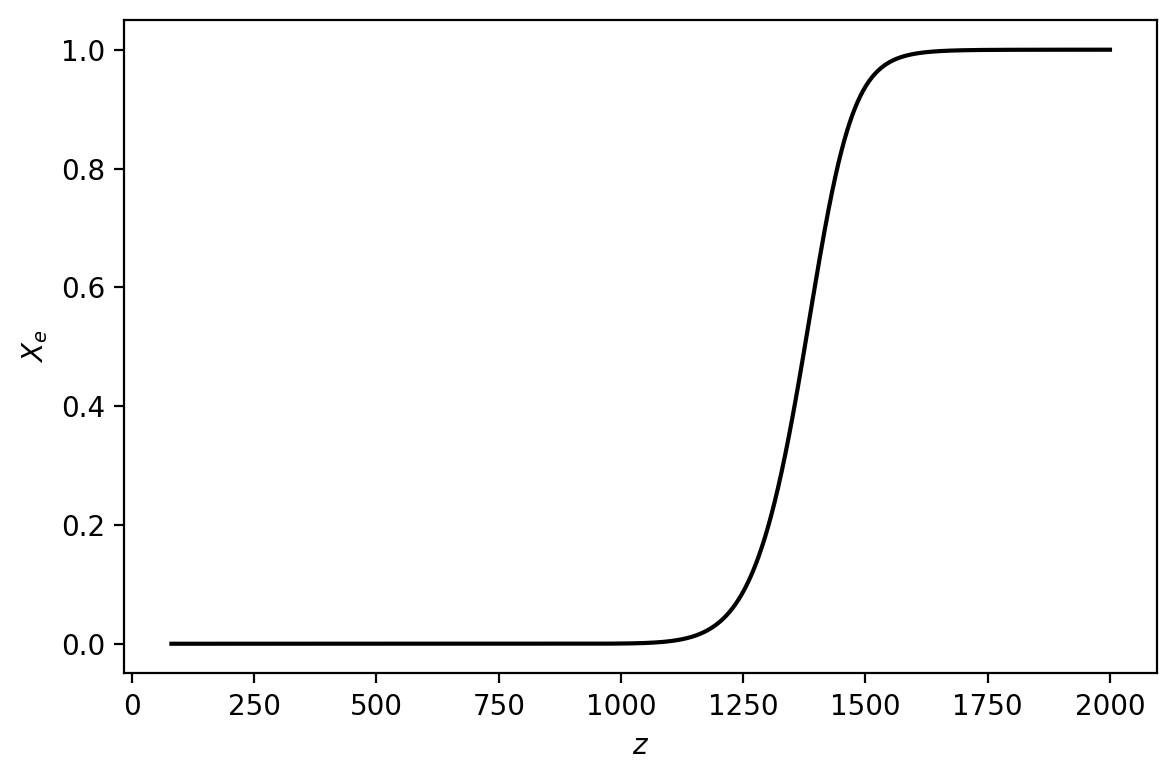

In [94]:
# define constants
eta = 6e-10
m_e = 0.511e6 # eV
EI = 13.6 # eV
T0 = 2.73/11606 # eV

# define functions of z
z = np.linspace(0,2000,10000)
T = T0*(1+z)
f = 2*zeta(3)/np.pi**2*eta*(2*np.pi*T/m_e)**(3/2)*np.exp(EI/T)
Xe = (-1 + np.sqrt(1 + 4*f))/(2*f)

# plot
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(z, Xe, '-k')
ax.set_ylabel(r'$X_e$')
ax.set_xlabel(r'$z$')
fig.tight_layout()

Qualitatively, this is the correct behavior ($X_e \sim 1$ in early universe, $X_e \sim 0$ in late universe).

3. From your figure, determine the redshift at which $X_e = 0.1$. How different is this from the redshift at which $X_e = 0.5$?

### *Solution:*

Text(1350.9375937593759, 0.7, 'z = 1375')

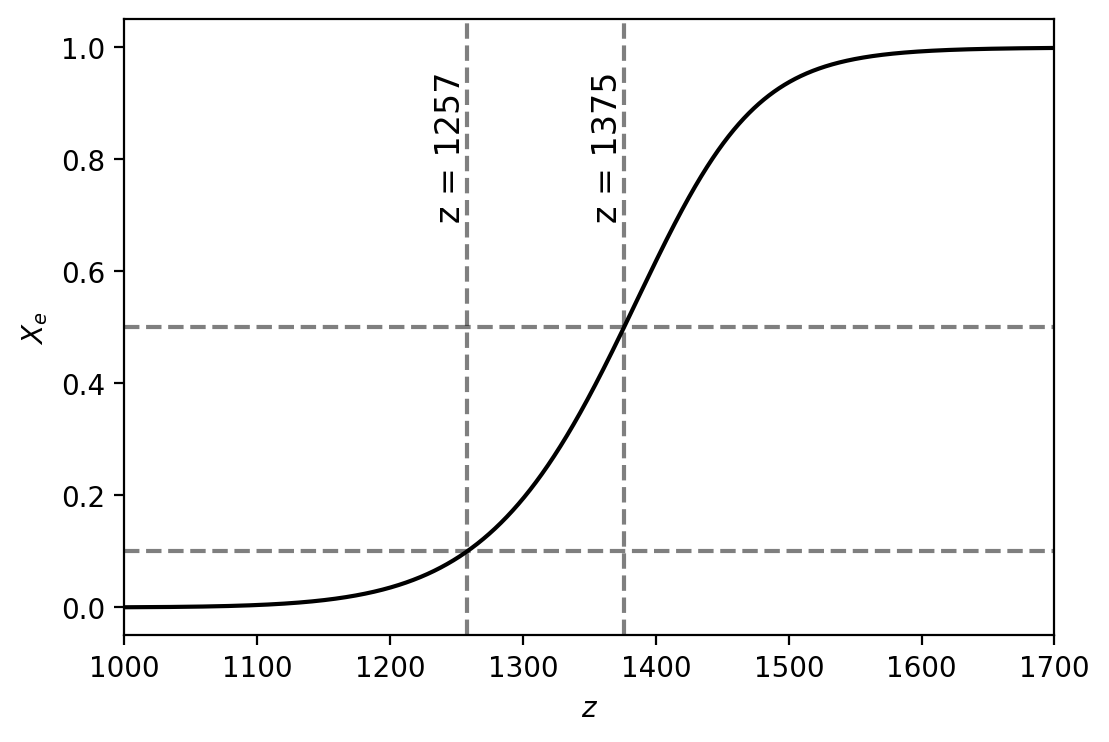

In [3]:
# plot
z_0p1 = z[np.nanargmin(np.abs(Xe-0.1))]
z_0p5 = z[np.nanargmin(np.abs(Xe-0.5))]

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(z, Xe, '-k')
ax.set_ylabel(r'$X_e$')
ax.set_xlabel(r'$z$')
ax.set_xlim([1000,1700])
ax.axhline(0.1, c='k', linestyle='dashed', alpha=0.5)
ax.axhline(0.5, c='k', linestyle='dashed', alpha=0.5)
ax.axvline(z_0p1, c='k', linestyle='dashed', alpha=0.5)
ax.axvline(z_0p5, c='k', linestyle='dashed', alpha=0.5)
ax.text(z_0p1-25, 0.7, f'z = {int(z_0p1)}', rotation='vertical', fontsize='large')
ax.text(z_0p5-25, 0.7, f'z = {int(z_0p5)}', rotation='vertical', fontsize='large')
#fig.tight_layout()

Using $z_{X_e = 0.1} = 1260$ and $z_{X_e = 0.5} = 1375$, there's relative difference of:
\begin{align*}
    \Delta z = 1375 - 1260 = 115,
\end{align*}
which is not a lot considering the overall redshift is $z > 1000$, but clearly this shows that recombination was not instantaneous either.

4. Calculate the age of the Universe at this epoch (assume a matter dominated Universe).

### *Solution:*

Age of the universe varies with the scale factor $a$ as:
\begin{align*}
    t &= -\frac{1}{H_0}\int_0^a\frac{da}{a^{-3(1+w)/2 + 1}}.
\end{align*}
For matter domination, we use $w = 0$. We'll also use the following:
\begin{align*}
    \frac{1}{a(t)} &= 1 + z, \\
    a(t) &= \frac{1}{1 + z}, \\
    da &= \frac{-dz}{(1 + z)^2},
\end{align*}
so our integral becomes:
\begin{align*}
    t &= -\frac{1}{H_0}\int_z^\infty\frac{dz}{(1 + z)^{5/2}}, \\
    u &= 1 + z, \\
    t &= -\frac{1}{H_0}\int_{1+z}^\infty\frac{du}{u^{5/2}}, \\
    t &= \frac{2}{3H_0}(1 + z)^{-3/2}.
\end{align*}
We'll use $h = 0.7$ and $z = 1257$ corresponding to $X_e = 0.1$:

In [26]:
z = 1257
h = 0.7
H0 = 100*0.7 * u.km / u.s / u.Mpc # km/s/Mpc
H0 = H0.to(1/u.yr) # 1/yr
t = 2/(3*H0)*(1 + z)**(-3/2) # yr
t

<Quantity 208706.66452925 yr>

So the epoch of reionization was about $\sim 200000$ years after the big bang.

Now, using this ionization fraction, estimate the decoupling redshift at which the Thomson scattering rate equals the Hubble rate. Again, estimate the age of the Universe at this epoch? What is the ionization fraction at this epoch?

### *Solution:*

To find when photon decoupling occurs, we need to find when $\Gamma = H$. The scattering rate is:
\begin{align*}
    \Gamma = cn_e\sigma_T,
\end{align*}
where $n_e$ is the electron number density, $\sigma_T$ is the Thomson scattering cross-section, and $c$ is included so $\Gamma$ has units of 1/s. $n_e$ is found using the ionization fraction $X_e$ from the Saha equation, and the Baryon number density:
\begin{align*}
    n_e &= X_en_b \\
    &= X_e\eta n_\gamma \\
    &= \frac{2\zeta(3)}{\pi^2}X_e\eta\left(\frac{k_BT}{hc}\right)^3,
\end{align*}
including full units so we can compare with $H$. So then we have:
\begin{align*}
    \Gamma = \frac{2\zeta(3)}{\pi^2}X_e\eta c\sigma_T\left(\frac{k_BT}{hc}\right)^3,
\end{align*}
and we use $T = T_0(1 + z)$:
\begin{align*}
    \Gamma = \frac{2\zeta(3)}{\pi^2}X_e\eta c\sigma_T\left(\frac{k_BT_0}{hc}\right)^3(1 + z)^3.
\end{align*}
Meanwhile the Hubble parameter for a matter-dominated universe is:
\begin{align*}
    H &= H_0[\Omega_{m,0}(1 + z)^3]^{1/2} \\
    &= H_0\Omega_{m,0}^{1/2}(1 + z)^{3/2}.
\end{align*}
Now we'll set $\Gamma = H$ and solve for $z$:
\begin{align*}
    \Gamma &= H, \\
    \frac{2\zeta(3)}{\pi^2}X_e\eta c\sigma_T\left(\frac{k_BT_0}{hc}\right)^3(1 + z)^3 &= H_0\Omega_{m,0}^{1/2}(1 + z)^{3/2}, \\
    (1 + z)^{3/2} &= \frac{\pi^2}{2\zeta(3)}\left(\frac{hc}{k_BT_0}\right)^3\frac{H_0\Omega_{m,0}^{1/2}}{X_e\eta c\sigma_T}, \\
    z &= \left[\frac{\pi^2}{2\zeta(3)}\left(\frac{hc}{k_BT_0}\right)^3\frac{H_0\Omega_{m,0}^{1/2}}{X_e\eta c\sigma_T}\right]^{2/3} - 1.
\end{align*}
We'll use $\Omega_{m,0} = 0.3$ and $X_e = 0.1$:

In [90]:
Omega_m = 0.3
Xe = 0.5
H0 = 100*0.7 * u.km/u.s/u.Mpc #
H0 = H0.to(1/u.s)
sigma_T = 6.65e-29 * u.m**2
T0 = 2.73 * u.K
k = 8.617e-5 * u.eV/u.K
h = 4.135e-15 * u.eV*u.s
c = 3e8 * u.m/u.s

z = (np.pi**2/(2*zeta(3))*(h*c/(k*T0))**3*H0*Omega_m**(1/2)/(Xe*eta*c*sigma_T))**(2/3) - 1
z

<Quantity 2498.66523858>

This value of $z$ for photon decoupling is much too large - it should be at least after decombination. We'll calculate the age of the universe and ionization fraction using both this value and the correct value $z \approx 1100$ from Baumann.

For $z = 2500$, the age of the universe (assuming matter domination) is:

In [92]:
z = 2500
H0 = H0.to(1/u.yr)
t = 2/(3*H0)*(1 + z)**(-3/2) # yr
t

<Quantity 74453.77825132 yr>

For $z = 1100$, the age of the universe (assuming matter domination) is:

In [93]:
z = 1100
t = 2/(3*H0)*(1 + z)**(-3/2) # yr
t

<Quantity 254903.79460606 yr>

For $z = 2500$, the ionization fraction is:

In [95]:
# define constants
eta = 6e-10
m_e = 0.511e6 # eV
EI = 13.6 # eV
T0 = 2.73/11606 # eV

# define functions of z
z = 2500
T = T0*(1+z)
f = 2*zeta(3)/np.pi**2*eta*(2*np.pi*T/m_e)**(3/2)*np.exp(EI/T)
Xe = (-1 + np.sqrt(1 + 4*f))/(2*f)
Xe

0.9999999680697478

For $z = 1100$, the ionization fraction is:

In [96]:
# define functions of z
z = 1100
T = T0*(1+z)
f = 2*zeta(3)/np.pi**2*eta*(2*np.pi*T/m_e)**(3/2)*np.exp(EI/T)
Xe = (-1 + np.sqrt(1 + 4*f))/(2*f)
Xe

0.004327223830501611

# "What-if" BBN

Define the neutron fraction as:
\begin{align*}
    X_n &= \frac{n_n}{n_n + n_p}.
\end{align*}

- Derive the equilibrium abundance:
\begin{align*}
    X_n &= \frac{e^{-Q/T}}{1 + e^{-Q/T}},
\end{align*}
where $Q = m_n - m_p = 1.3$ MeV.

### *Solution:*

While at equilibrium, we have:
\begin{align*}
    \left(\frac{n_n}{n_p}\right)_{eq} &= \left(\frac{m_n}{m_p}\right)^{3/2}e^{-(m_n - m_p)/T} \\
    &\approx e^{-(m_n - m_p)/T} \\ 
    &\approx e^{-Q/T},
\end{align*}
so:
\begin{align*}
    n_n &= n_pe^{-Q/T}.
\end{align*}
Therefore:
\begin{align*}
    X_n &= \frac{n_n}{n_n + n_p} \\
    &= \frac{n_pe^{-Q/T}}{n_pe^{-Q/T} + n_p} \\
    &= \frac{e^{-Q/T}}{1 + e^{-Q/T}}.
\end{align*}

- Assuming the “freezeout” temperature is 0.8 MeV, estimate the freeze out abundance of neutrons ($X_n$).

### *Solution:*

$Q = 1.3$ MeV. Therefore $X_n$ is:

In [97]:
Q = 1.3 * u.MeV
T = 0.8 * u.MeV
Xn = np.exp(-Q/T)/(1 + np.exp(-Q/T))
Xn

<Quantity 0.16451646>

- Assuming that all of these neutrons are converted to helium-4, calculate the mass fraction of helium $Y_P = 4n_{He}/n_H$.

All of our neutrons will convert to Helium, and this will take some of the protons with it:
\begin{align*}\
    2p + 2n &\to \text{He},
\end{align*}
which means we will have half as may Helium atoms as we had neutrons:
\begin{align*}
    n_{He} &= \frac{n_n}{2}.
\end{align*}
Therefore:
\begin{align*}
    Y_P &= \frac{4n_{He}}{n_H} \\
    &= \frac{2n_n}{n_p} \\
    &= 2e^{-Q/T}.
\end{align*}

In [105]:
YP = 2*np.exp(-Q/T)
YP

<Quantity 0.39382335>

Suppose that the mass difference between neutrons and protons was actually 2.6 MeV, but the freeze out temperature remains the same (since the former comes from strong nuclear forces, while the latter is set by weak interactions). What would the impact be on the helium abundance (assuming all else is unchanged)?

### *Solution:*

So now $Q = 2.3$ MeV while $T = 0.8$ MeV still. Redoing this we find for the neutron fraction:

In [108]:
Q = 2.3 * u.MeV
T = 0.8 * u.MeV
Xn = np.exp(-Q/T)/(1 + np.exp(-Q/T))
Xn

<Quantity 0.05340333>

And for the Helium abundance:

In [109]:
YP = 2*np.exp(-Q/T)
YP

<Quantity 0.11283228>

# Freeze-in of particle species

An interesting alternative to the usual freezeout production of relic particles, notably dark matter, is the freeze-in mechanism (reviewed in Bernal et al., 2017). Here, unlike in the standard freezeout scenario, the dark-matter particle was never in thermal equilibrium. Rather, the dark-matter particle $\chi$ is produced from the decay of some heavier, Standard-Model particle $\sigma$, so that $\sigma \to \chi\chi$ and $\delta n_\chi = -2\delta n_\sigma$. The interaction is characterized by a very small rate $\Gamma = \Gamma_{\sigma \to \chi\chi}$ which, unlike in the freezeout scenario, does not depend on the number density (i.e., it is some constant, possibly related to the mass of particles $\sigma$). For small enough $\Gamma$, the number density of dark-matter particles $\chi$ increases, then flattens off when the number density of $\sigma$ particles becomes Boltzmann-suppressed ($n_\sigma \propto e^{-m_\sigma/T} \ll 1$). You will now demonstrate and briefly investigate the feasibility of this scenario.

## a

For the freeze-in scenario, the Boltzmann equation reads:
\begin{align*}
    \frac{1}{a^3}\frac{d(na^3)}{dt} &= 2\Gamma h(x)n_{\sigma,\text{eq}}(t),
\end{align*}
where you can take $h(x) \cong x/(x + 2)$ in terms of our usual time variable $x \equiv m_\sigma/T$ below. Note that the density entering on the left-hand side is that of decay-product particles $\chi$ ($n \equiv n_\chi$), while the equilibrium density on the right-hand side is that of the decaying particles $\sigma$. And, as mentioned above, $\Gamma$ is time independent.

Starting from this equation and using a derivation similar to that in the freezeout scenario that goes from Eq. (6.12) to Eq. (6.14), demonstrate that the equivalent of the latter equation in the freeze-in picture is:
\begin{align*}
    \frac{dY}{dx} &= \lambda_1xh(x)Y_{\text{eq}}(x),
\end{align*}
where $\lambda_1$ is some constant. *Hint:* Because I am not asking that you derive $\lambda_1$ in terms of $\Gamma$ and the Hubble parameter at $m_\sigma = T$, all you need to do is track the $x$-dependence.

### *Solution:*

Starting from the left-hand side, we know $T \propto a^{-1}$, so:
\begin{align*}
    \text{LHS} &= \frac{1}{a^3}\frac{d(na^3)}{dt} \\
    &\propto T^3\frac{d(nT^{-3})}{dt},
\end{align*}
and then we'll define $Y = nT^{-3}$, resulting in:
\begin{align*}
    \text{LHS} &\propto T^3\frac{dY}{dt}.
\end{align*}
Using the chain rule, this becomes:
\begin{align*}
    \text{LHS} &\propto T^3\frac{dY}{dx}\frac{dx}{dt}.
\end{align*}
In class we found that:
\begin{align*}
    \frac{dx}{dt} &= Hx.
\end{align*}
For radiation domination:
\begin{align*}
    H^2 &= \frac{8\pi G}{3}\rho_R \\
    &\propto T^4, \\
    H &\propto T^2 \\
    &\propto x^{-2},
\end{align*}
so:
\begin{align*}
    \frac{dx}{dt} &\propto x^{-1},
\end{align*}
and the left-hand side is finally:
\begin{align*}
    \text{LHS} &\propto T^3\frac{dY}{dx}x^{-1}.
\end{align*}
For the right-hand side, we simply have $\Gamma$, which is a coonstant we can effectively ignore, and $n_{\sigma,\text{eq}}$, which becomes:
\begin{align*}
    n_{\sigma,\text{eq}}(t) = Y_{\text{eq}}(x)T^3,
\end{align*}
so we have:
\begin{align*}
    \text{RHS} &= 2\Gamma h(x)n_{\sigma,\text{eq}}(t) \\
    &\propto h(x)Y_{\text{eq}}(x)T^3.
\end{align*}
Putting both sides together, we get:
\begin{align*}
    \text{LHS} &= \text{RHS}, \\
    T^3\frac{dY}{dx}x^{-1} &\propto h(x)Y_{\text{eq}}(x)T^3, \\
    \frac{dY}{dx} &\propto xh(x)Y_{\text{eq}}(x), \\
    \frac{dY}{dx} &= \lambda_1xh(x)Y_{\text{eq}}(x),
\end{align*}
where in the last line we inserted the constant $\lambda_1$ to switch from a proportionality to an equality.

## b

Plot $Y(x)$ for $\lambda_1 = 10^{−6}, 10^{−8}, 10^{−10}$. Take a smallish initial value, say $Y(x_0) = 10^{−20}$. For the curves to look nice, start integrating at $x_0 = 0.01$, but plot only from $x = 0.1$ to $x = 100$. As in Problem 6.3, it may be easier to integrate $d\ln Y/d\ln x$. Also plot $Y_\text{eq}(x)$, thus again mimicking Fig. 6.1.

### *Solution:*

We are given $h(x) \cong x/(x + 2)$. Therefore, this is what we will be integrating:
\begin{align*}
    \frac{dY}{dx} &= \lambda_1\frac{x^2}{x + 2}Y_{\text{eq}}(x)
\end{align*}
The quantity $Y_{\text{eq}}(x)$ itself cannot be solved analytically, therefore we'll also have to solve for both $Y_{\text{eq}}(x)$ and $Y(x)$ numerically. In equilibrium, we can treat our particle number density using the Fermi-Dirac distribution:
\begin{align*}
    n_{\text{eq}} &= \frac{g}{(2\pi)^3}\int_0^\infty\frac{4\pi p^2dp}{e^{\sqrt{p^2+m^2}/T} + 1}.
\end{align*}
Defining $z = p/T$:
\begin{align*}
    n_{\text{eq}} &= \frac{gT^3}{(2\pi)^3}\int_0^\infty\frac{4\pi z^2dz}{e^{\sqrt{z^2+x^2}} + 1}, \\
    Y_{\text{eq}} &= \frac{g}{2\pi^2}\int_0^\infty\frac{z^2dz}{e^{\sqrt{z^2+x^2}} + 1},
    %&\cong \frac{1}{2\pi^2}\int_0^\infty\frac{z^2dz}{e^{\sqrt{z^2+x^2}} + 1},
\end{align*}
Here I am setting $g = 1$. integrating both sides we have:
\begin{align*}
    \int_{Y(x_0)}^{Y(x)}YdY &= \frac{\lambda_1}{2\pi^2}\int_{x_0}^x dx\frac{x^2}{x + 2}\int_0^\infty dz\frac{z^2}{e^{\sqrt{z^2+x^2}} + 1}, \\
\end{align*}
We'll also change variables to $\ln Y$ and $\ln x$:
\begin{align*}
    \int_{\ln Y(x_0)}^{\ln Y(x)}e^{2\ln Y}d\ln Y &= \frac{\lambda_1}{2\pi^2}\int_{\ln x_0}^{\ln x} d\ln x\frac{e^{3\ln x}}{e^{\ln x} + 2}\int_0^\infty dz\frac{z^2}{e^{\sqrt{z^2+e^{2\ln x}}} + 1}, \\
    e^{2\ln Y(x)} &= \frac{\lambda_1}{\pi^2}\int_{\ln x_0}^{\ln x} d\ln x\frac{e^{3\ln x}}{e^{\ln x} + 2}\int_0^\infty dz\frac{z^2}{e^{\sqrt{z^2+e^{2\ln x}}} + 1} + e^{2\ln Y(x_0)}, \\
    \ln Y(x) &= \frac{1}{2}\ln\left(\frac{\lambda_1}{\pi^2}\int_{\ln x_0}^{\ln x} d\ln x\frac{e^{3\ln x}}{e^{\ln x} + 2}\int_0^\infty dz\frac{z^2}{e^{\sqrt{z^2+e^{2\ln x}}} + 1} + Y(x_0)^2\right).
\end{align*}
Since we are taking $Y(x_0) = 10^{-20}$ to be be very small $Y(x_0) \ll \lambda$ $\forall$ $\lambda$, it is effectively zero and can be ignored. This way we can pull out the constant:
\begin{align*}
    \ln Y(x) &= \frac{1}{2}\ln\left(\int_{\ln x_0}^{\ln x} d\ln x\frac{e^{3\ln x}}{e^{\ln x} + 2}\int_0^\infty dz\frac{z^2}{e^{\sqrt{z^2+e^{2\ln x}}} + 1}\right) + \frac{1}{2}\ln\left(\frac{\lambda_1}{\pi^2}\right),
\end{align*}
or:
\begin{align*}
    \ln Y(x) &= \frac{1}{2}\ln\left(\int_{\ln x_0}^{\ln x} d\ln x\frac{e^{3\ln x}}{e^{\ln x} + 2}Y_{\text{eq}}(\ln x)\right) + \frac{1}{2}\ln\left(\frac{\lambda_1}{\pi^2}\right),
\end{align*}

In [118]:
def I1(z, logx):
    return z**2/(np.exp(np.sqrt(z**2 + np.exp(2*logx)) + 1))

def I2(logx):
    return np.exp(3*logx)/(np.exp(logx) + 2)*spi.quad(I1, 0, 1000, args=(logx))

logx = np.linspace(np.log(1e-2),np.log(1e3),1000)
lmbda = [1e-6, 1e-8, 1e-10]

# solve Yeq case
Yeq = np.zeros(1000)
for i in range(1000):
    Yeq[i] = spi.quad(I1, 0, 1000, args=(logx[i]))[0]

# solve general case
logY = np.zeros(1000)
for i in range(1,1000):
    I2 = np.exp(3*logx[:i])/(np.exp(logx[:i]) + 2)*Yeq[:i]
    logY[i] = np.log(spi.simpson(I2, logx[:i]))/2
logY[0] = logY[1] # adjust for missing zero value

# add freezeout value
logY_dict = {}
for l in lmbda:
    logY_dict[l] = logY + np.log(l/np.pi**2)/2

/var/folders/f_/73khkqyj0dx1wq_23cf6c41h0000gn/T/ipykernel_59233/2889344601.py:2: RuntimeWarning: overflow encountered in exp
  return z**2/(np.exp(np.sqrt(z**2 + np.exp(2*logx)) + 1))
/var/folders/f_/73khkqyj0dx1wq_23cf6c41h0000gn/T/ipykernel_59233/2889344601.py:19: RuntimeWarning: divide by zero encountered in log
  logY[i] = np.log(spi.simpson(I2, logx[:i]))/2


In [142]:
np.exp(logY_dict[l][10:])

array([6.71650326e-10, 7.14452375e-10, 7.56209943e-10, 7.97132795e-10,
       8.37388744e-10, 8.77114016e-10, 9.16422094e-10, 9.55408135e-10,
       9.94153940e-10, 1.03272982e-09, 1.07119780e-09, 1.10961225e-09,
       1.14802218e-09, 1.18647126e-09, 1.22499963e-09, 1.26364351e-09,
       1.30243678e-09, 1.34141036e-09, 1.38059359e-09, 1.42001354e-09,
       1.45969623e-09, 1.49966586e-09, 1.53994600e-09, 1.58055870e-09,
       1.62152567e-09, 1.66286736e-09, 1.70460410e-09, 1.74675513e-09,
       1.78933974e-09, 1.83237626e-09, 1.87588323e-09, 1.91987830e-09,
       1.96437946e-09, 2.00940390e-09, 2.05496923e-09, 2.10109230e-09,
       2.14779048e-09, 2.19508045e-09, 2.24297944e-09, 2.29150403e-09,
       2.34067142e-09, 2.39049821e-09, 2.44100165e-09, 2.49219840e-09,
       2.54410583e-09, 2.59674075e-09, 2.65012072e-09, 2.70426274e-09,
       2.75918463e-09, 2.81490361e-09, 2.87143781e-09, 2.92880476e-09,
       2.98702290e-09, 3.04611011e-09, 3.10608521e-09, 3.16696647e-09,
      

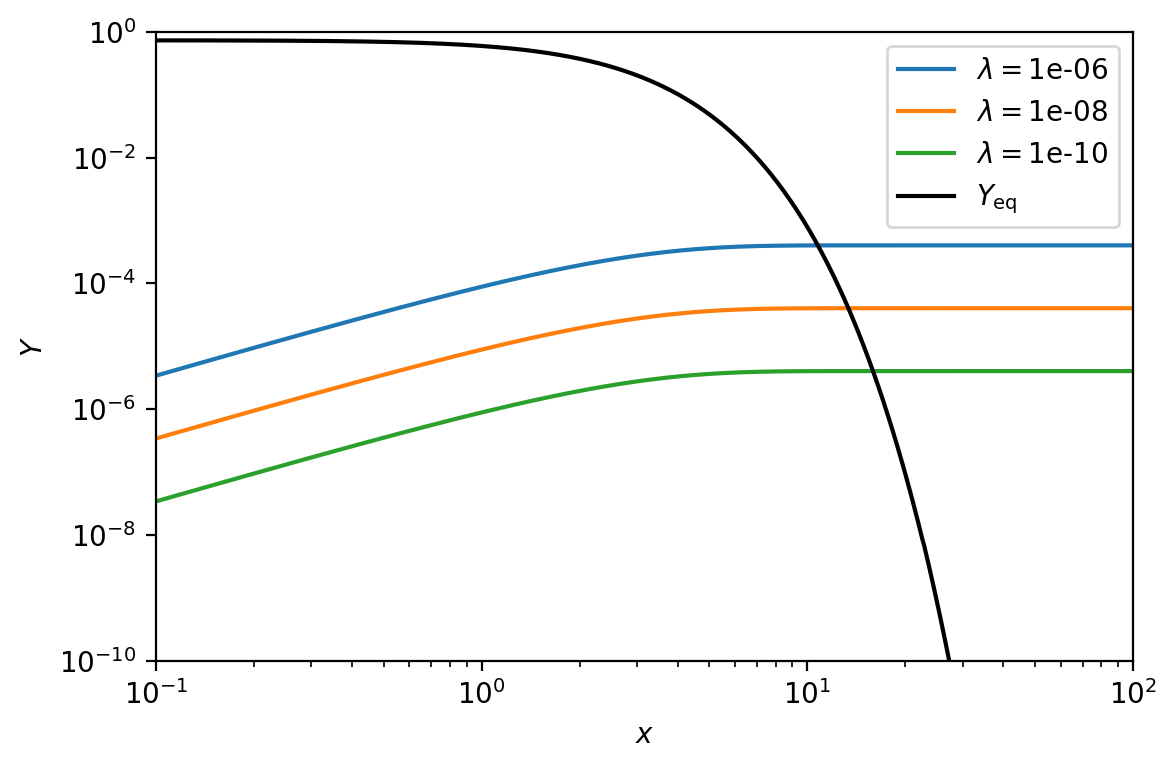

In [150]:
# plot
fig, ax = plt.subplots(figsize=(6,4))
for l in lmbda:
    ax.plot(np.exp(logx[10:]), np.exp(logY_dict[l][10:]), label=r'$\lambda = $'+str(l))
ax.plot(np.exp(logx[10:]), Yeq[10:], '-k', label=r'$Y_{\rm{eq}}$')
ax.set_ylabel(r'$Y$')
ax.set_xlabel(r'$x$')
ax.set_ylim([1e-10,1e0])
ax.set_xlim([0.1,100])
ax.loglog()
ax.legend()
fig.tight_layout()

This behavior seems believable. As mentioned previously, the particles are never in equilibrium, so $Y(x)$ does not follow $Y_{\text{eq}}(x)$ at any point. We also notice that the number density proxied by $Y(x)$ does increase over time as particles $\sigma$ decay. However, eventually $\sigma$ stop decaying and the number density $Y(x)$ "freezes-in."

### c

Comparing the figure you generated in part (b) and Fig. 6.1: what is the key difference between the freezeout and freeze-in scenarios as the annihilation/decay rate $\Gamma$ increases? Explain this qualitatively.

### *Solution:*

For the standard freezeout case covered in class, we found that as the reaction rate $\Gamma$ increases, the freezeout number density $Y(\infty)$ decreases. This makes sense because this case considers each reaction as lowering the total number of dark matter particles. However, in this case we notice that increasing $\Gamma$ also increases the freezeout number density $Y(\infty)$ increases. This makes sense because now each reaction is the decay of a regular particle $\sigma$ into a dark matter particle $\chi$, therefore more reactions means increasing $Y(x)$.